In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sn

warnings.filterwarnings('ignore')
import nltk
nltk.download('stopwords')

data = pd.read_csv('BBC News Train.csv', 
                          encoding = 'iso-8859-1')
print('There are', len(data), 'data points.')
data.head(3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
There are 1490 data points.


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business


In [2]:
print(data.shape)

(1490, 3)


In [3]:
data['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

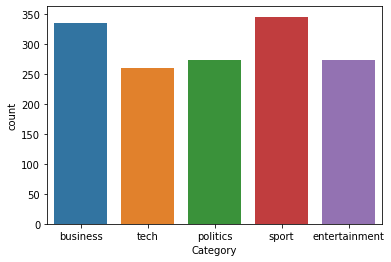

In [4]:
import seaborn as sns

%matplotlib inline

sns.countplot(x='Category', data=data)



In [5]:
# Calculate the percentage of each data 

per = round((data['Category'].value_counts()*100))/len(data)
print(per)

sport            23.221477
business         22.550336
politics         18.389262
entertainment    18.322148
tech             17.516779
Name: Category, dtype: float64


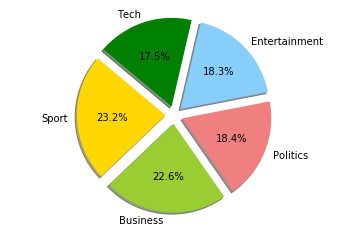

In [0]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Sport', 'Business', 'Politics', 'Entertainment', 'Tech'
sizes = per
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'green']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(data.Category.unique()))
data['label'] = le.transform(list(data.Category.values))
#data.head()
data.sample(5, random_state=0)

,ArticleId,Text,Category,label
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,1
354,1349,tory candidate quits over remark a conservativ...,politics,2
1227,1572,bath faced with tindall ultimatum mike tindall...,sport,3
907,1155,chancellor rallies labour voters gordon brown ...,politics,2
575,307,young debut cut short by ginepri fifteen-year-...,sport,3


In [0]:
for i, label in enumerate(le.classes_):
    print(i, ':', label)

0 : business
1 : entertainment
2 : politics
3 : sport
4 : tech


In [0]:
import re, string
from nltk.corpus import stopwords

def processnews(news):

    news = news.lower()    
    #Remove Special charaters and urls
    news = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', news)    
    #Remove usernames
    news = re.sub('@[^\s]+','',news)    
    #Remove white space
    news = news.strip()    
    #Remove hashtags
    news = re.sub(r'#([^\s]+)', '', news)   
    #Remove stopwords
    news = " ".join([word for word in news.split(' ') if word not in stopwords.words('english')])
    #Remove punctuation
    news = "".join(l for l in news if l not in string.punctuation)
    
    return news

data['text_preprocessed'] = data['Text'].map(lambda x: processnews(x))

In [0]:
data.head(10)
#data.sample(5, random_state=0)

,ArticleId,Text,Category,label,text_preprocessed
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,0,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,0,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,4,lifestyle governs mobile choice faster bett...
4,917,enron bosses in $168m payout eighteen former e...,business,0,enron bosses 168m payout eighteen former enron...
5,1582,howard truanted to play snooker conservative...,politics,2,howard truanted play snooker conservative le...
6,651,wales silent on grand slam talk rhys williams ...,sport,3,wales silent grand slam talk rhys williams say...
7,1797,french honour for director parker british film...,entertainment,1,french honour director parker british film dir...
8,2034,car giant hit by mercedes slump a slump in pro...,business,0,car giant hit mercedes slump slump profitabili...
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,1,fockers fuel festive film chart comedy meet fo...


First the baseline accuracy:

In [0]:
data['label'].value_counts()/len(data)

3    0.232215
0    0.225503
2    0.183893
1    0.183221
4    0.175168
Name: label, dtype: float64

In [0]:
#CountVectorizer +
from sklearn.feature_extraction.text import CountVectorizer
text = data['text_preprocessed'].values
vectorizer = CountVectorizer(ngram_range = (1, 2))
vectorizer.fit(text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
from sklearn.model_selection import train_test_split
X = vectorizer.transform(text)
y = data['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_test.shape)

(298, 269143)


In [0]:
#tf idf approach

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split

text = data['text_preprocessed'].values
tfidfconverter = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(text).toarray()
y = data['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_test.shape)

(298, 5000)


NB : 0.9731543624161074


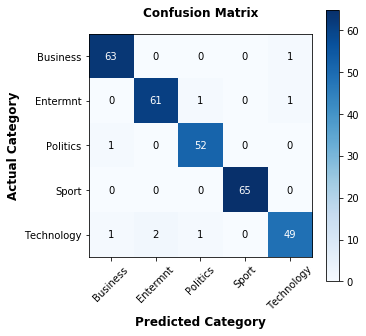

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        64
           1       0.97      0.97      0.97        63
           2       0.96      0.98      0.97        53
           3       1.00      1.00      1.00        65
           4       0.96      0.92      0.94        53

    accuracy                           0.97       298
   macro avg       0.97      0.97      0.97       298
weighted avg       0.97      0.97      0.97       298

RF : 0.9328859060402684


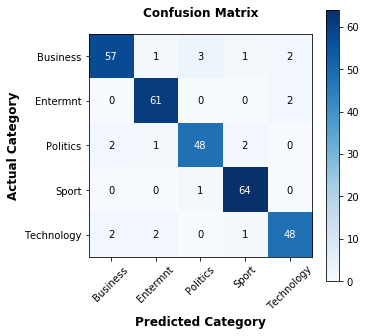

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        64
           1       0.94      0.97      0.95        63
           2       0.92      0.91      0.91        53
           3       0.94      0.98      0.96        65
           4       0.92      0.91      0.91        53

    accuracy                           0.93       298
   macro avg       0.93      0.93      0.93       298
weighted avg       0.93      0.93      0.93       298



In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
%matplotlib inline

labels = ['Business', 'Entermnt' , 'Politics' , 'Sport' , 'Technology']

clfs = {
        'NB': MultinomialNB(), 
        'RF': RandomForestClassifier()
        }

def test_clf(clf_dict, Xtrain, ytrain):
    for clf_name, clf in clf_dict.items():

        #training
        classifier = clf.fit(Xtrain, ytrain)
        print(clf_name,':', clf.score(X_test, y_test))
        
        #predictions test set
        predictions = classifier.predict(X_test)

        #confusion matrix
        cm = confusion_matrix(y_test, predictions)
        
        fig, ax = plot_confusion_matrix(conf_mat = cm,colorbar=True)
        fig.set_size_inches(5,5)
        plt.title('Confusion Matrix',fontsize='large', fontweight='bold')
        ax.set_xticklabels([''] + labels,rotation=45)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted Category',fontsize='large', fontweight='bold')
        plt.ylabel('Actual Category',fontsize='large', fontweight='bold')
        plt.show()

        #classification report
        cr = classification_report(y_test, predictions)
        print(cr)

        
test_clf(clfs, X_train, y_train)